# Refined Cosmic Rays Cleaning
By María Chillarón Víctor. 

Master's Thesis: 'Introduction to bidimensional studies of low-mass galaxies with MEGARA/GTC'. Supervised by Jesús Gallego, Cristina Cabello and Nicolás Cardiel. Universidad Complutense de Madrid. June 2024.

In [6]:
from astropy.io import fits
from astropy import units as u

import copy
import matplotlib.pyplot as plt
import numpy as np
import pprint

In [14]:
def clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2):
    
    with fits.open(filename, mode='update') as hdulist:
        data = hdulist[0].data
    
    # Extraction of the spectrum from affected fiber who id is 'fibid'.
        spec = data[fibid,:]
        spec_interp = spec.copy()

    # Lower and upper numbers of pixel where the cosmic ray signal starts and ends.
        start_CR = start_pixel
        end_CR = end_pixel
    
    # Lineal interpolation:
        # We determine the continuum values, choosing the number of pixels we move left and right from each side of the CR signal.
        # h1 number of pixels to the left; h2 number of pixels to the right
        start_cont = spec_interp[start_CR - h1]
        end_cont = spec_interp[end_CR  + h2]

    # Now we substitute the CR signal by the linear interpolation.
        clean_spec = spec_interp.copy()
        clean_spec[start_CR:end_CR + 1] = np.interp(np.arange(start_CR, end_CR + 1),
                                                         [start_CR, end_CR],
                                                         [start_cont, end_cont])
        data[fibid,:] = clean_spec

    # We can plot the result and compare the before and after:
    plt.figure(figsize=(10, 6))
    plt.plot(spec_interp, linewidth=2,color='black', label='Original spectrum')
    plt.plot(clean_spec, linewidth=2, color='orange', linestyle='dashdot',label='Corrected spectrum')
    plt.xlabel('Pixel')
    plt.ylabel('Flux [Jy]')
    #plt.xlim([2000, 2050])
    #plt.ylim([0, 0.0001])
    
    plt.title(f'Refined Cosmic Rays Cleaning at Fiber {fibid+1}')
    plt.legend()
    plt.grid(True)

    #plt.savefig('corrected_spectrum_fiber_ID.pdf')
    plt.show()

## Example of use: MEGARA VPH LR-R. A spectrum of galaxy SBS 0335$-$052 W

In [8]:
filename = 'final_rss_OB9_SBS0335052W.fits'

First of all, we are going to visualize the spectrum of the affected fiber to find out the pixel positions of the CR signal.

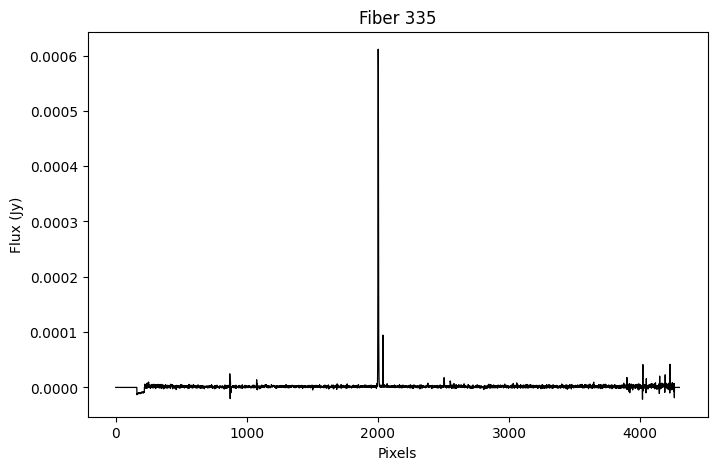

In [16]:
hdulist = fits.open(filename)
data = hdulist[0].data
spectrum = data[334,:]  #change "334" by fiber number - 1 = fibid

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(spectrum, c='black', linewidth=0.9)
plt.xlabel('Pixels')
plt.ylabel('Flux (Jy)')
plt.title(f'Fiber {fibid+1}')

# Modify these parameters to look for the exact position of the CR:
#plt.xlim([2000, 2050])
#plt.ylim([0, 0.0001])

plt.show()
hdulist.close()

### Fiber 335

In [9]:
fibid = 335 - 1

In [17]:
start_pixel = 2035
end_pixel = 2040
h1 = 10
h2 = 10

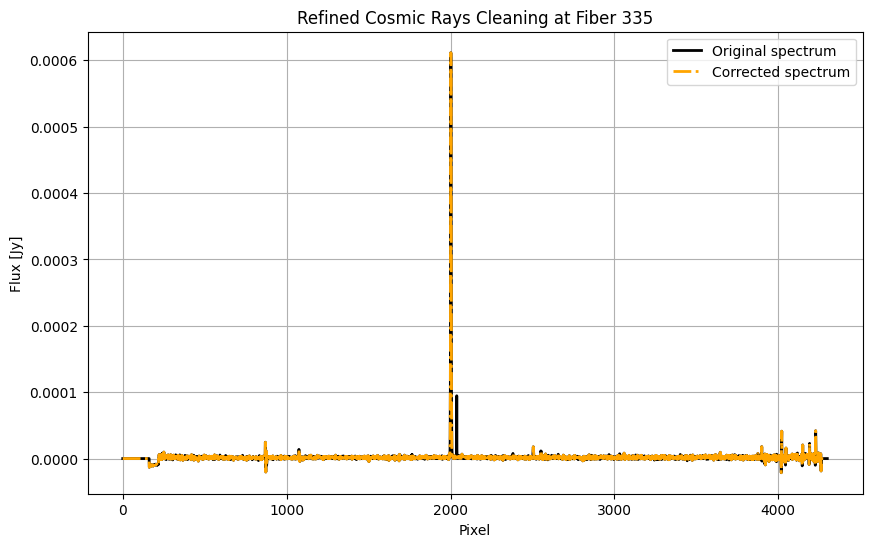

In [18]:
clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2)

### Fiber 329

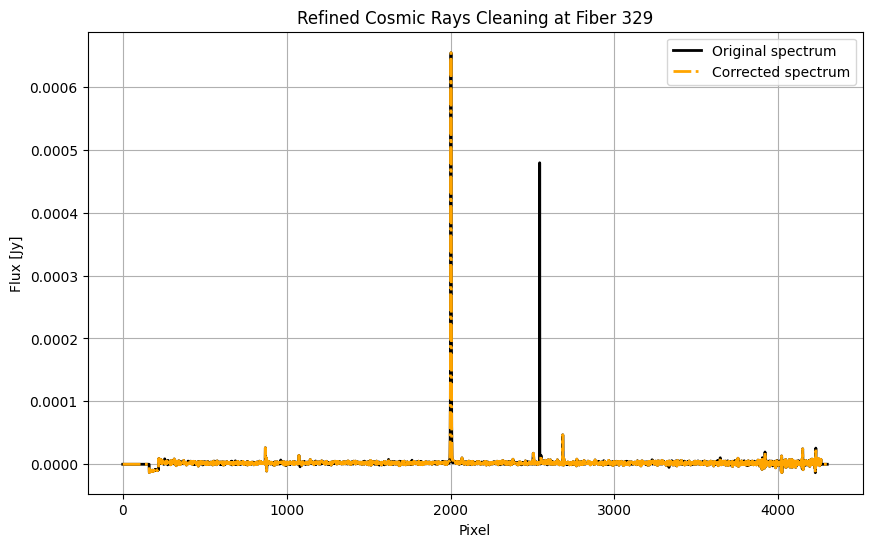

In [20]:
fibid = 329 - 1
start_pixel = 2542
end_pixel = 2546
h1 = 10
h2 = 10

clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2)

### Fiber 340

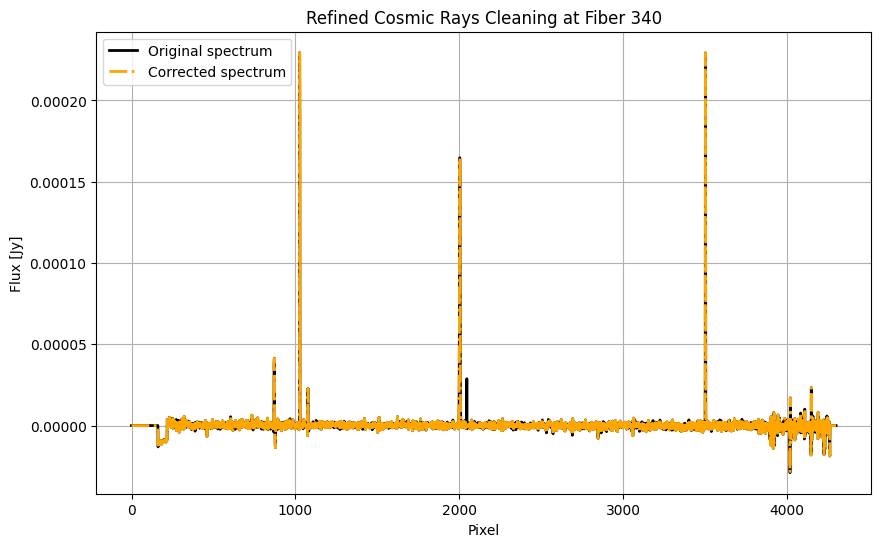

In [21]:
fibid = 340 - 1
start_pixel = 2042
end_pixel = 2048
h1 = 10
h2 = 10

clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2)

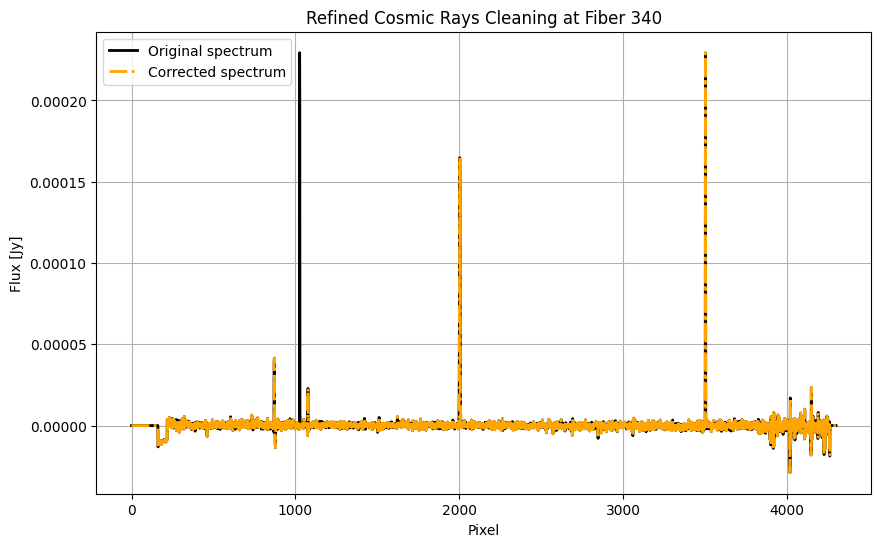

In [22]:
start_pixel = 1024
end_pixel = 1029
h1 = 10
h2 = 10

clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2)

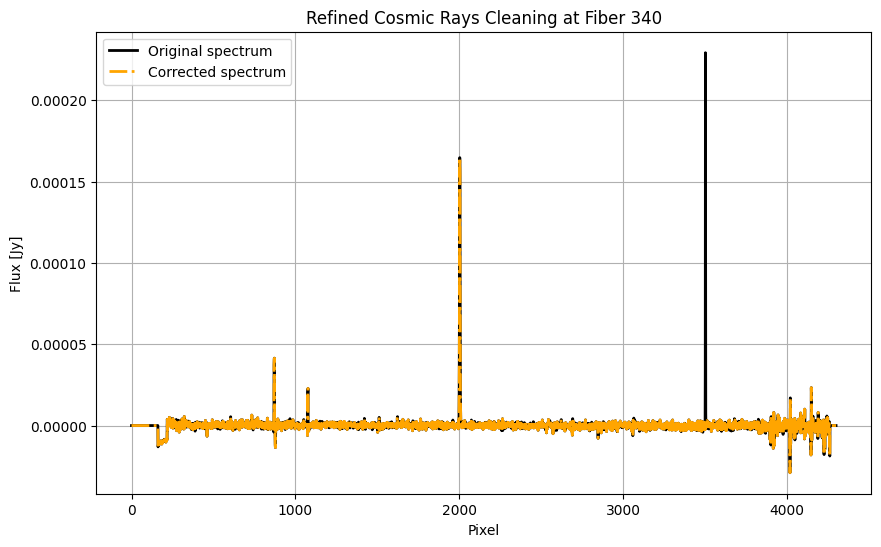

In [23]:
start_pixel = 3500
end_pixel = 3505
h1 = 10
h2 = 10

clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2)

### Fiber 308

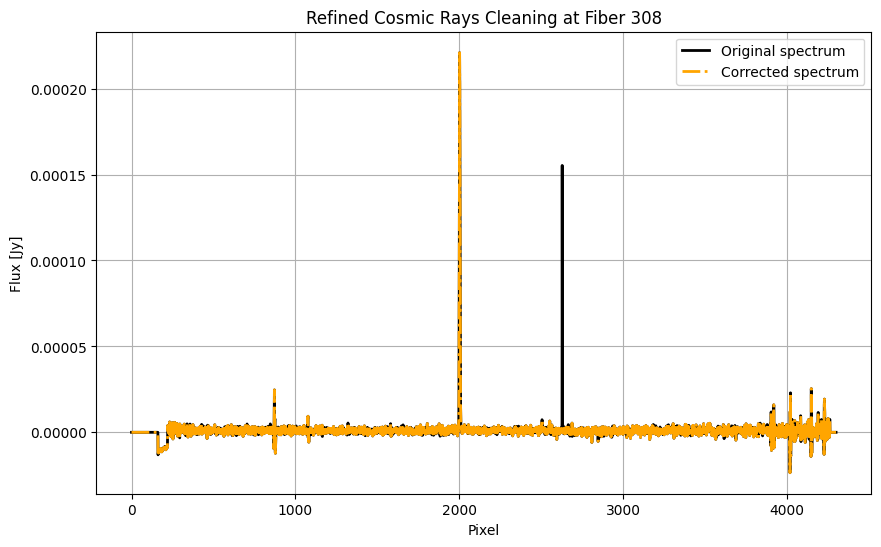

In [24]:
fibid = 308 - 1
start_pixel = 2626
end_pixel = 2631
h1 = 10
h2 = 10

clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2)

### Fiber 323

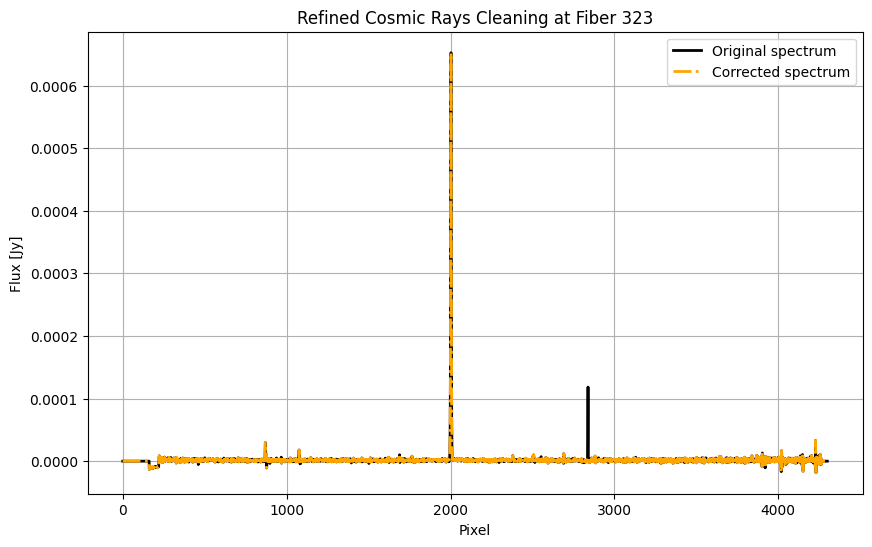

In [25]:
fibid = 323 - 1
start_pixel = 2836
end_pixel = 2841
h1 = 10
h2 = 10

clean_CR(filename, fibid, start_pixel, end_pixel, h1, h2)